<a href="https://colab.research.google.com/github/hyeonseonn/sensing_app/blob/main/%5B0809new%5D_machine_learning_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. CNN_LSTM (20개 과거 → 5개 미래)

📊 업무시간 평균 CPU 사용률: 81.82%
📊 비업무시간 평균 CPU 사용률: 45.74%
✅ 조건 1 만족 여부 (둘 중 더 큰 값 기준 ≥ 80%): True (81.82%)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

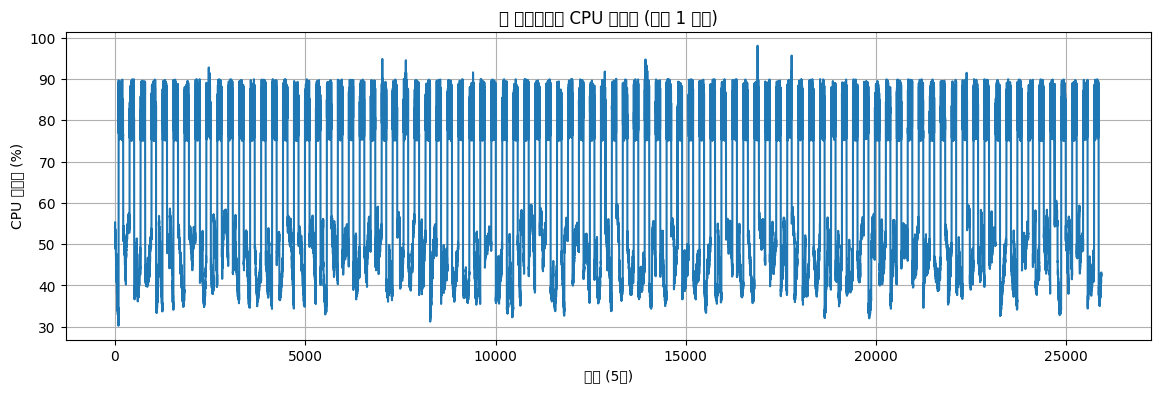

In [1]:
import numpy as np
from scipy.signal import sawtooth
import matplotlib.pyplot as plt

np.random.seed(42)
days = 90
points_per_day = 24 * 12
total_points = days * points_per_day

# 시간축
time = np.linspace(0, 1, total_points)

# 🌀 mix_wave를 날짜별로 다른 파형으로 생성 (불규칙성 강화)
mix_wave = np.zeros(total_points)
for d in range(days):
    offset = np.random.uniform(0, 2*np.pi)
    amp = np.random.uniform(0.8, 1.2)
    freq = np.random.uniform(0.8, 1.3)
    start = d * points_per_day
    end = (d+1) * points_per_day
    t = np.linspace(0, 2*np.pi, points_per_day)
    wave = (
        amp * np.sin(freq * t + offset) +
        0.3 * sawtooth(freq * t + offset) +
        0.2 * (2 * np.abs((t / np.pi) % 2 - 1) - 1)
    )
    wave += np.random.normal(0, 0.1, points_per_day)
    mix_wave[start:end] = wave

# 🎯 trend도 날마다 다르게 생성
trend = np.zeros(total_points)
for d in range(days):
    start = d * points_per_day
    end = (d + 1) * points_per_day
    slope = np.random.uniform(-5, 5)
    curve = np.random.uniform(0, 3)
    t = np.linspace(0, 1, points_per_day)
    trend[start:end] = slope * t + curve * (t - 0.5)**2

# 업무시간 마스크
work_hours = np.zeros(total_points)
for d in range(days):
    start_idx = d * points_per_day + 8 * 12
    end_idx = d * points_per_day + 18 * 12
    work_hours[start_idx:end_idx] = 1.0

# 📈 업무시간 부스팅도 날짜별로 랜덤한 범위에서 다르게 적용
boost_add = np.zeros(total_points)
for d in range(days):
    boost_level = np.random.uniform(20, 30)
    start_idx = d * points_per_day + 8 * 12
    end_idx = d * points_per_day + 18 * 12
    boost_add[start_idx:end_idx] = boost_level + np.random.normal(0, 5, end_idx - start_idx)

# ✅ 최종 CPU 사용률: 더 불규칙하게 구성
cpu = 45 + 10 * mix_wave + trend + boost_add

# ✅ 업무시간 하한선 보정
cpu = np.where((work_hours == 1) & (cpu < 75), np.random.uniform(75, 90, size=total_points), cpu)

# ✅ 전체 하한선 보정 (자연스러움 유지)
cpu = np.where(cpu < 30, 30 + (30 - cpu) * 0.3, cpu)

# ✅ 평균 계산
work_cpu = cpu[work_hours == 1.0]
nowork_cpu = cpu[work_hours == 0.0]
avg_work_cpu = np.mean(work_cpu)
avg_nowork_cpu = np.mean(nowork_cpu)
avg_cpu = max(avg_work_cpu, avg_nowork_cpu)
condition1 = avg_cpu >= 80

# ✅ 결과 출력
print(f"📊 업무시간 평균 CPU 사용률: {avg_work_cpu:.2f}%")
print(f"📊 비업무시간 평균 CPU 사용률: {avg_nowork_cpu:.2f}%")
print(f"✅ 조건 1 만족 여부 (둘 중 더 큰 값 기준 ≥ 80%): {condition1} ({avg_cpu:.2f}%)")

# ✅ 시각화 (5일만)
plt.figure(figsize=(14, 4))
plt.plot(cpu)
plt.title("📈 자연스러운 CPU 사용률 (조건 1 만족)")
plt.xlabel("시간 (5일)")
plt.ylabel("CPU 사용률 (%)")
plt.grid(True)
plt.show()


📊 업무시간 평균 CPU 사용률: 29.45%
📊 비업무시간 평균 CPU 사용률: 22.35%
📊 전체 표준편차: 3.6746
✅ 축소 조건 만족 여부: True


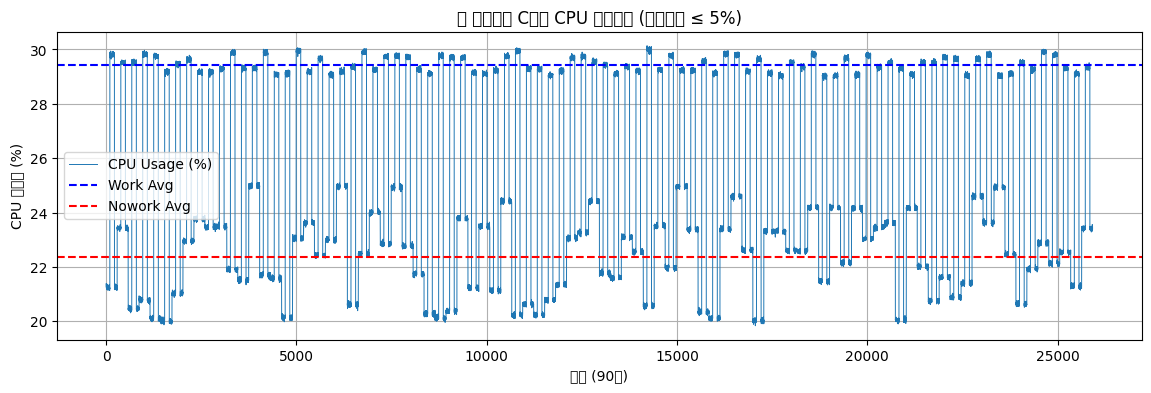

In [ ]:
np.random.seed(42)
days = 90
points_per_day = 24 * 12
total_points = days * points_per_day

# 업무시간 마스크
work_hours = np.zeros(total_points)
for d in range(days):
    start = d * points_per_day + 8 * 12
    end = d * points_per_day + 18 * 12
    work_hours[start:end] = 1.0

# 🔻 mix_wave 제거 수준으로 축소
mix_wave = np.random.normal(0, 0.001, total_points)  # 거의 평평한 파형

# 🔻 trend 완전 제거
trend = np.zeros(total_points)

# 🔻 boost: 평균만 유지, 분산은 극소화
boost_add = np.zeros(total_points)
for d in range(days):
    # 업무시간 boost: 고정값 + 아주 작은 노이즈
    work_boost = np.random.uniform(24, 25)
    start = d * points_per_day + 8 * 12
    end = d * points_per_day + 18 * 12
    boost_add[start:end] = work_boost + np.random.normal(0, 0.05, end - start)

    # 비업무시간 boost: 고정값 + 아주 작은 노이즈
    nowork_boost = np.random.uniform(15, 20)
    start1 = d * points_per_day
    end1 = d * points_per_day + 8 * 12
    boost_add[start1:end1] = nowork_boost + np.random.normal(0, 0.05, end1 - start1)

    start2 = d * points_per_day + 18 * 12
    end2 = (d+1) * points_per_day
    boost_add[start2:end2] = nowork_boost + np.random.normal(0, 0.05, end2 - start2)

# ✅ 최종 CPU
cpu = 5 + mix_wave + trend + boost_add  # 거의 flat

# ✅ 하한선 보정
cpu = np.where(cpu < 5, 5, cpu)

# ✅ 평가 지표
work_cpu = cpu[work_hours == 1.0]
nowork_cpu = cpu[work_hours == 0.0]
avg_work_cpu = np.mean(work_cpu)
avg_nowork_cpu = np.mean(nowork_cpu)
std_total = np.std(cpu)

condition1 = avg_work_cpu <= 30
condition2 = avg_work_cpu > avg_nowork_cpu
condition3 = std_total <= 5
all_conditions = condition1 and condition2 and condition3

# ✅ 결과 출력
print(f"📊 업무시간 평균 CPU 사용률: {avg_work_cpu:.2f}%")
print(f"📊 비업무시간 평균 CPU 사용률: {avg_nowork_cpu:.2f}%")
print(f"📊 전체 표준편차: {std_total:.4f}")
print(f"✅ 축소 조건 만족 여부: {all_conditions}")

# ✅ 시각화
plt.figure(figsize=(14, 4))
plt.plot(cpu, label='CPU Usage (%)', linewidth=0.7)
plt.axhline(avg_work_cpu, color='blue', linestyle='--', label='Work Avg')
plt.axhline(avg_nowork_cpu, color='red', linestyle='--', label='Nowork Avg')
plt.title("📉 초저변동 C등급 CPU 시나리오 (표준편차 ≤ 5%)")
plt.xlabel("시간 (90일)")
plt.ylabel("CPU 사용률 (%)")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # 데이터 생성
# np.random.seed(42)
# days = 90
# points_per_day = 24 * 12

# # 복잡한 데이터
# # 1. 데이터 생성
# np.random.seed(42)
# total_points = days * points_per_day
# theta = np.linspace(0, 30 * np.pi, total_points)

# # 복합 파형 구성
# mix_wave = (
#     0.6 * np.sin(theta) +
#     0.3 * sawtooth(theta * 0.7) +
#     0.2 * (2 * np.abs((theta / np.pi) % 2 - 1) - 1) +
#     np.random.normal(0, 0.1, total_points)
# )

# mix_wave = np.where(mix_wave < 0, mix_wave * 1.8, mix_wave * 0.8)

# # ✅ 비선형 트렌드 수정
# # 앞부분 감소 → 중간 유지 → 끝부분 증가 형태로 설계/*
# # 구간별로 조합
# x = np.linspace(0, 1, total_points)
# trend = np.piecewise(x,
#     [x < 0.3, (x >= 0.3) & (x < 0.7), x >= 0.7],
#     [
#         lambda x: -10 * x,               # 앞부분 감소
#         lambda x: -3,                    # 중간 유지
#         lambda x: 20 * (x - 0.7)**1.5    # 끝부분 우상향 (가속 곡선)
#     ]
# )

# # 3. 업무시간 부스팅
# # 업무시간: 08:00 ~ 18:00 (10시간) → 10 * 12 = 120 step/day
# work_hours = np.zeros(total_points)

# for d in range(days):
#     start_idx = d * points_per_day + 8 * 12     # 08:00
#     end_idx = d * points_per_day + 18 * 12      # 18:00
#     work_hours[start_idx:end_idx] = 1.0         # 업무시간 표시

# # 사용률 부스팅: 업무시간에는 +30~50% 정도 올려줌
# boost = work_hours * np.random.uniform(0.5, 0.6, size=total_points)

# # 4. 최종 CPU 사용률 계산
# cpu = 60 + 30 * mix_wave + trend + 10 * boost  # boost를 퍼센트로 보정


# # 단순한 데이터
# # total_points = days * points_per_day
# # cpu = 50 + 10*np.sin(np.linspace(0, 50, total_points)) + np.random.normal(0, 0.5, total_points) + np.linspace(0, 20, total_points)


time_index = pd.date_range('2025-06-01', periods=total_points, freq='5min')
df = pd.DataFrame({'timestamp': time_index, 'cpu': cpu}).set_index('timestamp')

scaler = MinMaxScaler()
cpu_scaled =pd.DataFrame( scaler.fit_transform(df[['cpu']]))

past_steps = 20
future_steps = 5

# ✅ 데이터 분할 (80:10:10)
n_total = len(cpu_scaled)
n_train = int(n_total * 0.8)
n_val   = int(n_total * 0.1)

cpu_train = cpu_scaled.iloc[:n_train]
cpu_val   = cpu_scaled.iloc[n_train:n_train + n_val]
cpu_test  = cpu_scaled.iloc[n_train + n_val:]

# ✅ 시퀀스 생성 함수
def create_sequences(data, past_steps=20, future_steps=5):
    X, y = [], []
    for i in range(len(data) - past_steps - future_steps):
        X.append(data.iloc[i:i+past_steps].values)
        y.append(data.iloc[i+past_steps:i+past_steps+future_steps].values)
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(cpu_train, past_steps, future_steps)
X_val,   y_val   = create_sequences(cpu_val, past_steps, future_steps)
X_test,  y_test  = create_sequences(cpu_test, past_steps, future_steps)

# ✅ 모델 정의 및 학습 (validation 포함)
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dense(future_steps)
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train.reshape((y_train.shape[0], -1)),
    epochs=5,
    batch_size=16,
    validation_data=(X_val, y_val.reshape((y_val.shape[0], -1))),
    verbose=1
)

# ✅ 테스트 예측 및 성능 평가
pred = model.predict(X_test).reshape(-1, future_steps)
true = y_test.reshape(-1, future_steps)
pred_inv = scaler.inverse_transform(pred)
true_inv = scaler.inverse_transform(true)

print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R²  :", r2_score(true_inv, pred_inv))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1295/1295 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0267 - val_loss: 0.0090
Epoch 2/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 3/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0087 - val_loss: 0.0086
Epoch 4/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 5/5
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0091 - val_loss: 0.0082
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
MAE : 3.152322293717264
RMSE: 6.146838617240776
R²  : 0.8880963110053234


CNN-LSTM
MAE : 3.5195295536921494
RMSE: 6.554543799648671
R2: 0.8727594484711668


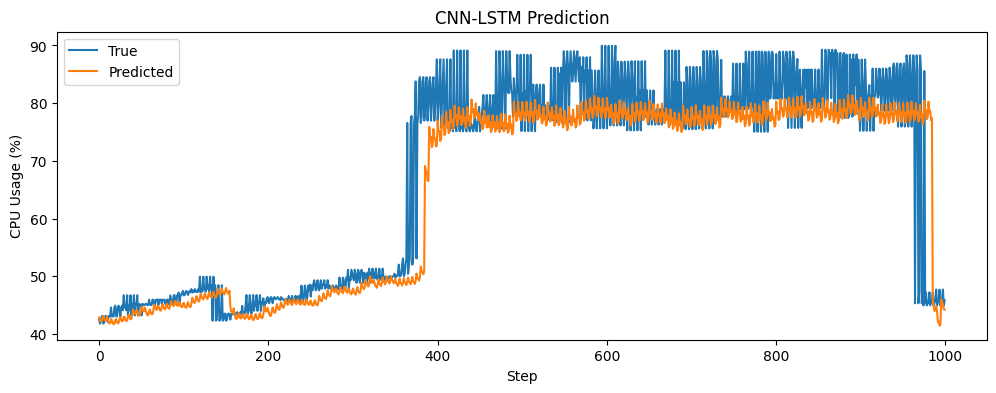

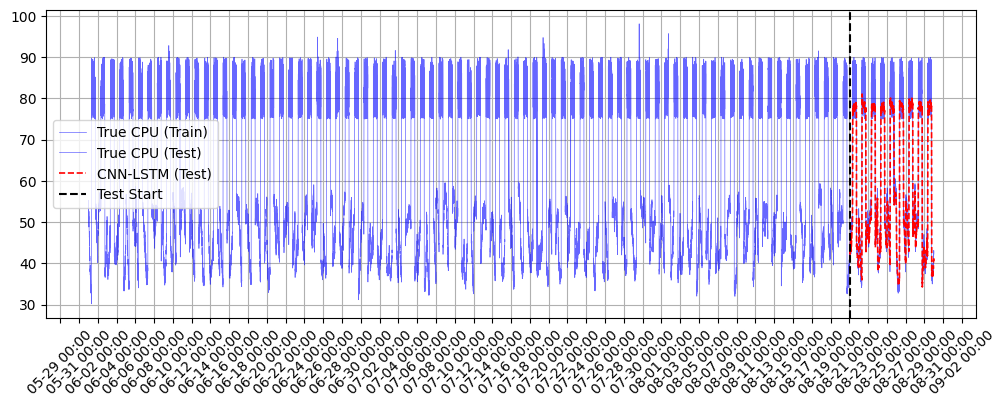

In [6]:
# plot

print("CNN-LSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R2:", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:1000], label="True")
plt.plot(pred_inv.flatten()[:1000], label="Predicted")
plt.title("CNN-LSTM Prediction")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['cpu'][:test_start_idx]  # Test 시작 전까지
val_series = df['cpu'][train_end:val_end] # validation data
test_series_true= df['cpu'][test_start_idx:]

# test_series_true = pd.Series(true_inv[:,0].flatten(), index=test_time_index) # test data (True)
all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp 매핑
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # 샘플 끝나는 시점 + (j+1)*5분
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True CPU (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN-LSTM (Test)", color="red", linestyle="--", linewidth = 1.2)
plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


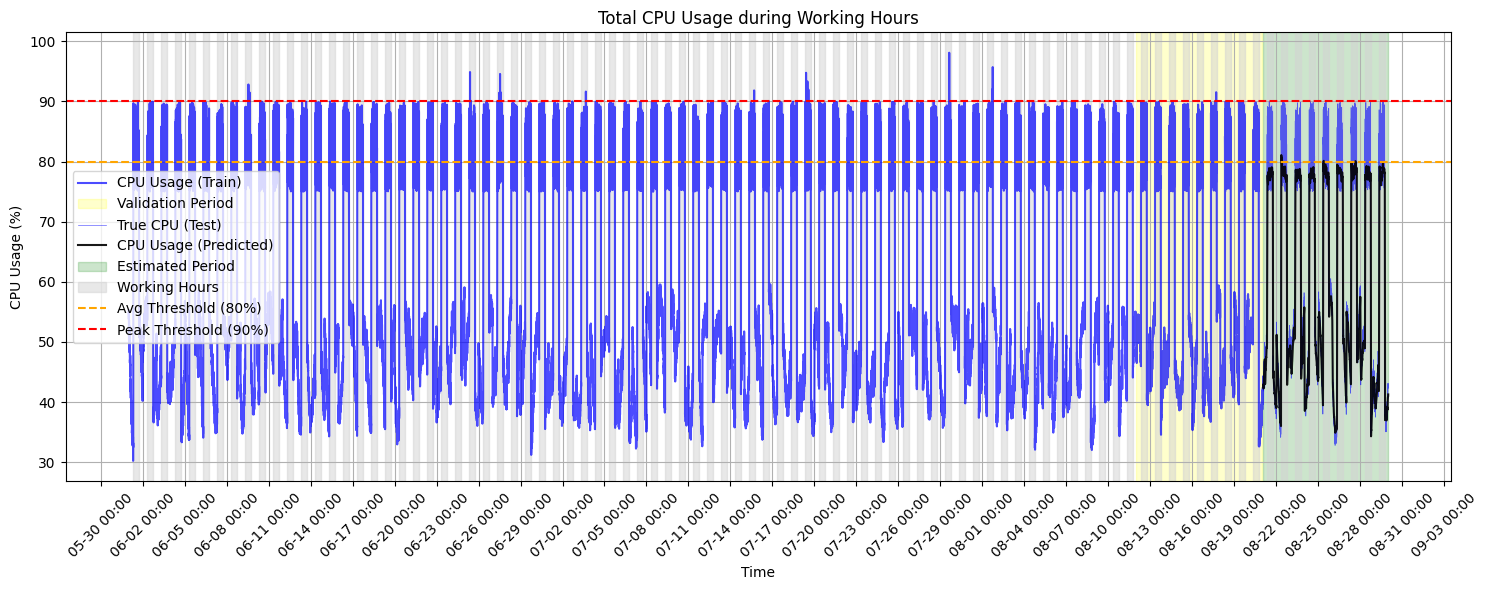

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
# 한글 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# 1. 전체 예측 시계열 구성 (Train은 실제값, Test는 예측값)
all_pred_series = pd.concat([
    df['cpu'][:test_time_index[0]],       # Train 구간은 실제 측정값
    test_series_pred                      # Test 구간은 예측값
])
all_pred_series.name = "cpu_pred"

# 2. 업무시간 (08:00~18:00), 비업무시간 추출
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. 조건 1: 평균 CPU 사용률 ≥ 80% (업무시간, 비업무시간 분리)
avg_threshold = 80
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # 업무시간 또는 비업무 시간에 average 80 % 이상이면 증설 필요

# 4. 조건 2: 피크(≥90%) 발생한 날이 전체의 80% 이상
# peak_threshold = 90
# daily_peak_flags = (all_pred_series > peak_threshold)


# 조건2 수정 : μ + 2σ 이상 // 90% 이상 중 더 높은 경우를 피크로 간주,  피크 발생한 날이 전체의 80% 이상
abs_threshold = 90
rel_threshold = all_pred_series.quantile(0.95)
peak_threshold = max(abs_threshold, rel_threshold)
daily_peak_flags = all_pred_series > peak_threshold

daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.8




# 5. 증설 판단
upgrade_flag = condition1_flag or condition2_flag

# 6. Upgrade 표시할 시간대 지정
if condition1_flag:
    upgrade_times = work_time.index
elif condition2_flag:
    # 조건 2 충족 시 peak 발생일 기준
    peak_day_list = daily_peak[daily_peak].index[:5]  # 최대 5일
    upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
else:
    upgrade_times = []

# 7. 시각화 (Train과 Test 색상 구분)
fig, ax = plt.subplots(figsize=(15, 6))

# Train 구간
train_series = df['cpu'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="CPU Usage (Train)", color="blue", alpha=0.7)

# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test 구간
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test 정답값
ax.plot(test_series_pred.index, test_series_pred.values, label="CPU Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# 업무시간 배경 색칠
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # 첫 번째에만 라벨 부여
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# 기준선
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (80%)")
ax.axhline(peak_threshold, color='red', linestyle='--', label="Peak Threshold (90%)")

# # 업그레이드 신호 표시
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# 마무리 설정
ax.set_title("Total CPU Usage")
ax.set_xlabel("Time")
ax.set_ylabel("CPU Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit 위한 csv 저장

# 평균 사용률 저장
cpu_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
cpu_avg_df.to_csv("cpu_avg_usage_CNN-LSTM3.csv", index=False)

import json
with open("cpu_accuracy_metrics_CNN-LSTM3.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_CNN-LSTM3.csv") # 전체 cpu
test_series_pred.to_csv("cpu_usage_predicted_only_CNN-LSTM3.csv") # 예측 구간 cpu
work_time.to_csv("cpu_usage_working_hours_CNN-LSTM3.csv") # 업무시간 cpu
daily_peak.to_csv("cpu_peak_flag_per_day_CNN-LSTM3.csv") # peak 발생 여부

with open("upgrade_decision_CNN-LSTM3.txt", "w") as f: # 업그레이드 유무
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("cpu_plot_CNN-LSTM3.png")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/tmp/ipython-input-611503533.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range("2025-01-01", periods=len(data), freq="H")
/tmp/ipython-input-611503533.py:50: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-611503533.py:50: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-611503533.py:50: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-611503533.py:50: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-611503533.py:50: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-611503533.py:50: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE 

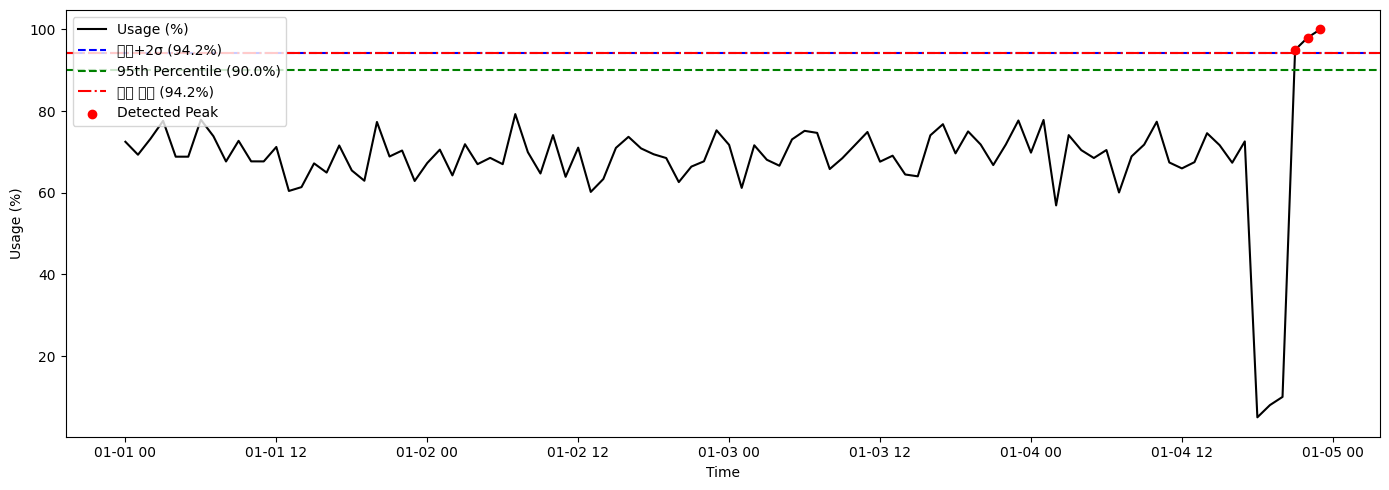

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 1. 나눔고딕 폰트 설치
!apt-get update -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')  # 나눔고딕 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# ---------- 1. 예시 데이터 생성 ----------
np.random.seed(42)
# 정상 구간: 평균 70, 표준편차 5
normal_data = np.random.normal(70, 5, 90)
# 몇 개의 낮은 값(비정규성 유발)
low_outliers = np.array([5, 8, 10])
# 몇 개의 높은 값(진짜 peak)
high_outliers = np.array([95, 98, 100])
data = np.concatenate([normal_data, low_outliers, high_outliers])

# 시간 인덱스
time_index = pd.date_range("2025-01-01", periods=len(data), freq="H")
series = pd.Series(data, index=time_index)

# ---------- 2. 세 가지 기준 계산 ----------
mu = series.mean()
sigma = series.std()
thr_mean_std = mu + 2 * sigma           # 평균 + 2σ
thr_abs = 90                            # 절대 기준
thr_mix = max(thr_abs, thr_mean_std)  # 혼합 기준

# ---------- 3. 그래프 ----------
plt.figure(figsize=(14, 5))
plt.plot(series.index, series.values, label="Usage (%)", color="black")

# 기준선 표시
plt.axhline(thr_mean_std, color="blue", linestyle="--", label=f"평균+2σ ({thr_mean_std:.1f}%)")
plt.axhline(thr_abs, color="green", linestyle="--", label=f"95th Percentile ({thr_abs:.1f}%)")
plt.axhline(thr_mix, color="red", linestyle="-.", label=f"혼합 기준 ({thr_mix:.1f}%)")

# 피크 영역 하이라이트
is_peak = series > thr_mix
plt.scatter(series.index[is_peak], series[is_peak], color="red", label="Detected Peak", zorder=5)

plt.xlabel("Time")
plt.ylabel("Usage (%)")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


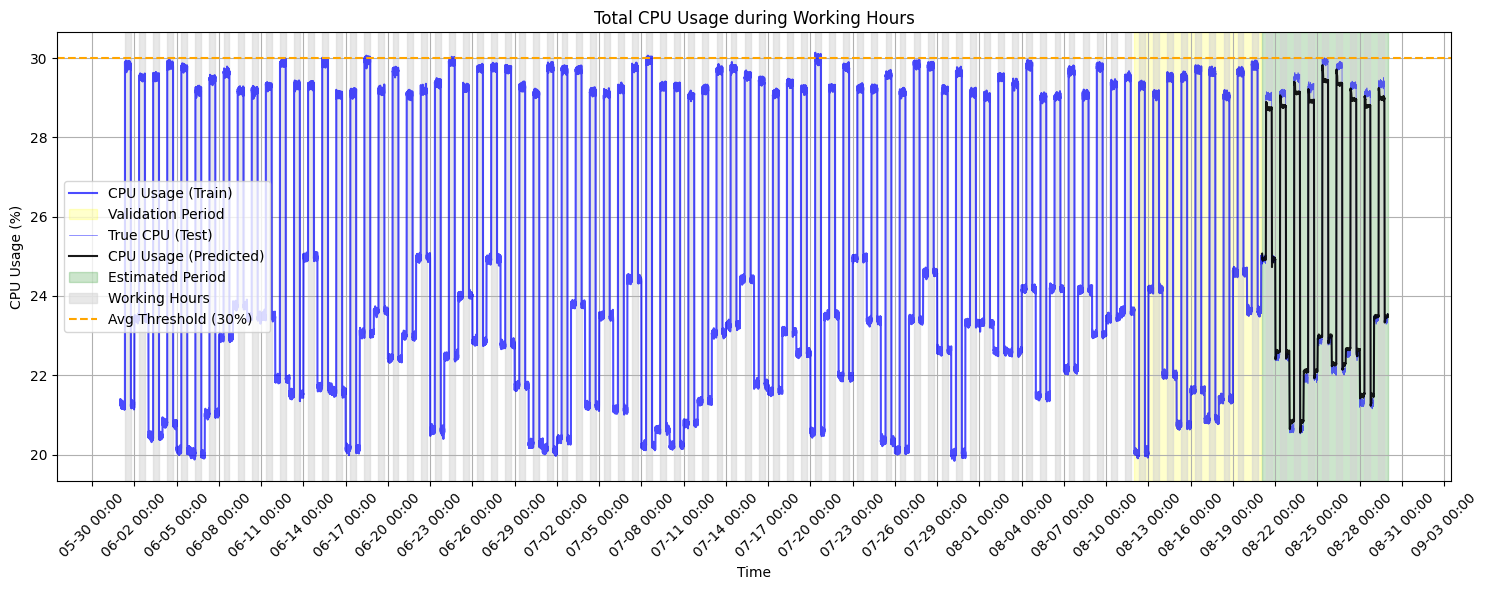

In [ ]:
# 축소 data 저장
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. 전체 예측 시계열 구성 (Train은 실제값, Test는 예측값)
all_pred_series = pd.concat([
    df['cpu'][:test_time_index[0]],       # Train 구간은 실제 측정값
    test_series_pred                      # Test 구간은 예측값
])
all_pred_series.name = "cpu_pred"

# 2. 업무시간 (08:00~18:00), 비업무시간 추출
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. 조건 1: 업무시간 평균 CPU 사용률 ≤ 30%
condition1_flag = work_time.mean() <= 30
avg_threshold = 30

# 4. 조건 2: 업무시간 > 비업무시간 평균
condition2_flag = work_time.mean() > nowork_time.mean()

# 5. 조건 3: 전체 표준편차 ≤ 5%
std_all = all_pred_series.std()
condition3_flag = std_all <= 5

# 6. 축소 판단
downgrade_flag = condition1_flag and condition2_flag and condition3_flag

# 7. 축소 표시할 시간대 지정 (조건 1 기준)
if condition1_flag:
    downgrade_times = work_time.index
else:
    downgrade_times = []

# 8. 시각화에서 축소 신호 표시 (옵션)
# if len(downgrade_times) > 0:
#     ax.scatter(downgrade_times, work_time.loc[downgrade_times], color='green', label="Downgrade Signal", zorder=5, s=20)


# 7. 시각화 (Train과 Test 색상 구분)
fig, ax = plt.subplots(figsize=(15, 6))

# Train 구간
train_series = df['cpu'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="CPU Usage (Train)", color="blue", alpha=0.7)

# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test 구간
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test 정답값
ax.plot(test_series_pred.index, test_series_pred.values, label="CPU Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# 업무시간 배경 색칠
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # 첫 번째에만 라벨 부여
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# 기준선
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (30%)")

# # 업그레이드 신호 표시
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# 마무리 설정
ax.set_title("Total CPU Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("CPU Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit 위한 csv 저장

# 평균 사용률 저장
cpu_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
cpu_avg_df.to_csv("cpu_avg_usage_CNN-LSTM4.csv", index=False)

import json
with open("cpu_accuracy_metrics_CNN-LSTM4.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_CNN-LSTM4.csv") # 전체 cpu
test_series_pred.to_csv("cpu_usage_predicted_only_CNN-LSTM4.csv") # 예측 구간 cpu
work_time.to_csv("cpu_usage_working_hours_CNN-LSTM4.csv") # 업무시간 cpu

# 9. 텍스트 저장
with open("downgrade_decision_CNN-LSTM4.txt", "w") as f:
    f.write(f"Condition 1 (Work avg ≤ 30): {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2 (Work avg > Nowork avg): {condition2_flag} ({work_time.mean():.2f}% > {nowork_time.mean():.2f}%)\n")
    f.write(f"Condition 3 (STD ≤ 5): {condition3_flag} ({std_all:.2f})\n")
    f.write(f"Final Decision: {'Downgrade Recommended' if downgrade_flag else 'No Downgrade'}\n")

fig.savefig("cpu_plot_CNN-LSTM4.png")

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


## 2. 단순 CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from scipy.signal import sawtooth


# 복잡한 데이터
# 1. 데이터 생성
# np.random.seed(42)
# days = 90
# points_per_day = 24 * 12
# total_points = days * points_per_day
# theta = np.linspace(0, 30 * np.pi, total_points)

# # 복합 파형 구성
# mix_wave = (
#     0.6 * np.sin(theta) +
#     0.3 * sawtooth(theta * 0.7) +
#     0.2 * (2 * np.abs((theta / np.pi) % 2 - 1) - 1) +
#     np.random.normal(0, 0.1, total_points)
# )

# mix_wave = np.where(mix_wave < 0, mix_wave * 1.8, mix_wave * 0.8)

# # ✅ 비선형 트렌드 수정
# # 앞부분 감소 → 중간 유지 → 끝부분 증가 형태로 설계
# # 구간별로 조합
# x = np.linspace(0, 1, total_points)
# trend = np.piecewise(x,
#     [x < 0.3, (x >= 0.3) & (x < 0.7), x >= 0.7],
#     [
#         lambda x: -10 * x,               # 앞부분 감소
#         lambda x: -3,                    # 중간 유지
#         lambda x: 20 * (x - 0.7)**1.5    # 끝부분 우상향 (가속 곡선)
#     ]
# )

# # 최종 CPU 시계열
# cpu = 60 + 40 * mix_wave + trend

# time_index = pd.date_range('2025-06-01', periods=total_points, freq='5min')
# df = pd.DataFrame({'timestamp': time_index, 'cpu': cpu}).set_index('timestamp')

# scaler = MinMaxScaler()
# cpu_scaled =pd.DataFrame( scaler.fit_transform(df[['cpu']]))

# past_steps = 20
# future_steps = 5

# # ✅ 데이터 분할 (80:10:10)
# n_total = len(cpu_scaled)
# n_train = int(n_total * 0.8)
# n_val   = int(n_total * 0.1)

# cpu_train = cpu_scaled.iloc[:n_train]
# cpu_val   = cpu_scaled.iloc[n_train:n_train + n_val]
# cpu_test  = cpu_scaled.iloc[n_train + n_val:]

# # 정규화는 train만 fit
# split_point = int(len(cpu_scaled) * 0.8)
# df_train = cpu_scaled.iloc[:split_point]
# df_test = cpu_scaled.iloc[split_point:]


# # 시퀀스 생성
# def create_sequences(dataset, past_steps=20, future_steps=5):
#     X, y = [], []
#     for i in range(len(dataset) - past_steps - future_steps):
#         X.append(dataset[i:i+past_steps])
#         y.append(dataset[i+past_steps:i+past_steps+future_steps])
#     return np.array(X), np.array(y)

# past_steps = 20
# future_steps = 5

# X_train, y_train = create_sequences(cpu_train, past_steps, future_steps)
# X_val,   y_val   = create_sequences(cpu_val, past_steps, future_steps)
# X_test,  y_test  = create_sequences(cpu_test, past_steps, future_steps)


# CNN-only 모델
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(future_steps)
])
model.compile(optimizer='adam', loss='mse')

# reshape for Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train_cnn, y_train, epochs=20, batch_size=16, verbose=1)
pred = model.predict(X_test_cnn).reshape(-1, future_steps)
true = y_test.reshape(-1, future_steps)

pred_inv = scaler.inverse_transform(pred)
true_inv = scaler.inverse_transform(true)



Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1295/1295 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0313
Epoch 2/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0109
Epoch 3/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0103
Epoch 4/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0112
Epoch 5/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0115
Epoch 6/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0115
Epoch 7/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0104
Epoch 8/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0102
Epoch 9/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0104
Epoch 10/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0110
Epoch 11/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0107
Epoch 12/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0108
Epoch 13/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0100
Epoch 14/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0107
Epoch 15/20
1295/1295 ━━━━━━━━━━━━━━━━━━

CNN
MAE : 0.3269026518428911
RMSE: 1.0206500140058565
R²  : 0.9169731868921186


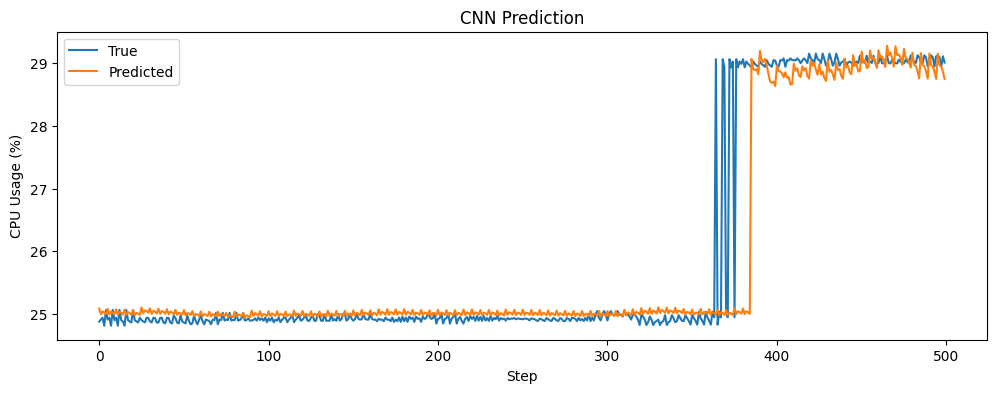

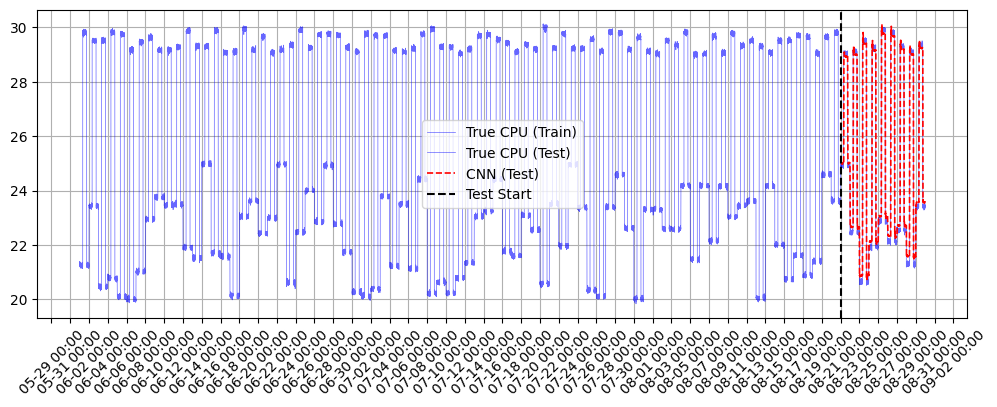

In [ ]:
# plot

print("CNN")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R²  :", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:500], label="True")
plt.plot(pred_inv.flatten()[:500], label="Predicted")
plt.title("CNN Prediction")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)
test_start_idx = val_end + past_steps
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
train_series = df['cpu'][:test_start_idx]  # Test 시작 전까지
val_series = df['cpu'][train_end:val_end] # validation data
test_series_true= df['cpu'][test_start_idx:]

# test_series_true = pd.Series(true_inv[:,0].flatten(), index=test_time_index) # test data (True)
all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp 매핑
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # 샘플 끝나는 시점 + (j+1)*5분
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True CPU (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN (Test)", color="red", linestyle="--", linewidth = 1.2)
plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # 20시간 간격
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

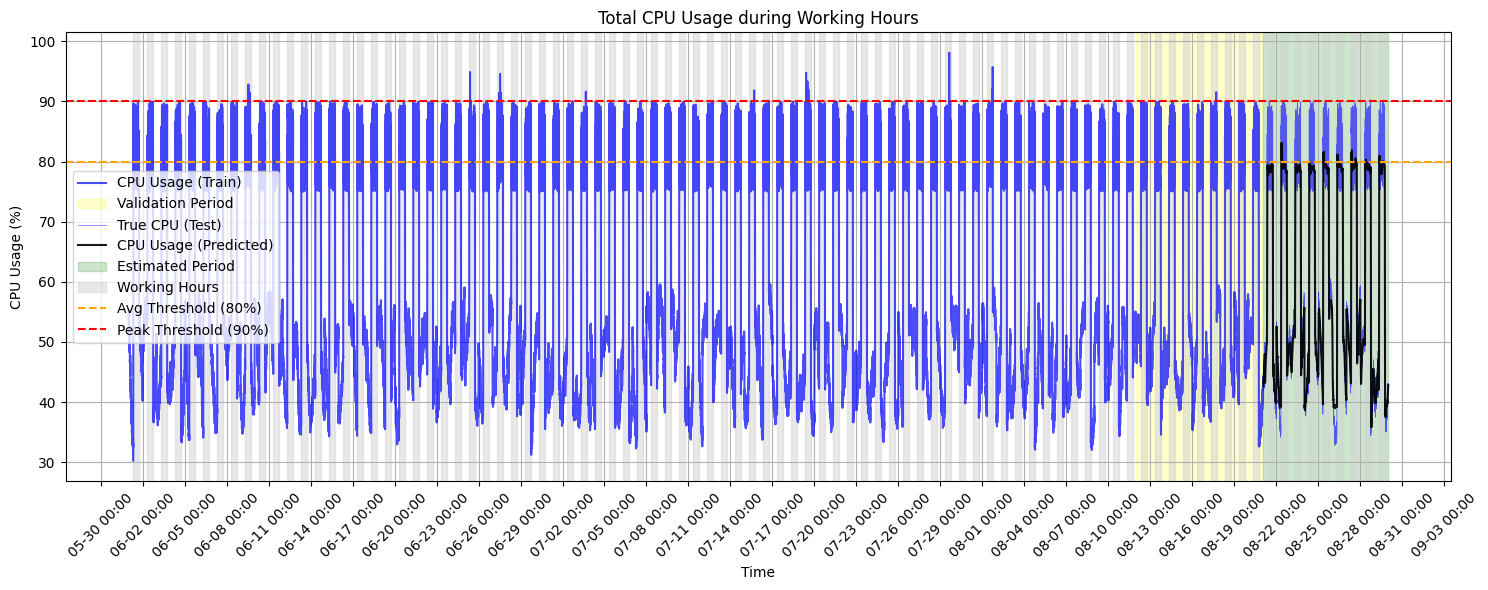

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. 전체 예측 시계열 구성 (Train은 실제값, Test는 예측값)
all_pred_series = pd.concat([
    df['cpu'][:test_time_index[0]],       # Train 구간은 실제 측정값
    test_series_pred                      # Test 구간은 예측값
])
all_pred_series.name = "cpu_pred"

# 2. 업무시간 (08:00~18:00)만 추출
work_time = all_pred_series.between_time("08:00", "18:00")

# 3. 조건 1: 업무시간 평균 CPU 사용률 ≥ 80%
avg_threshold = 80
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # 업무시간 또는 비업무 시간에 average 80 % 이상이면 증설 필요

# 4. 조건 2: 업무시간 중 피크(≥90%) 발생한 날이 전체의 80% 이상
peak_threshold = 90
daily_peak_flags = (all_pred_series > peak_threshold)
daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.8

# 5. 증설 판단
upgrade_flag = condition1_flag or condition2_flag

# 6. Upgrade 표시할 시간대 지정
if condition1_flag:
    upgrade_times = work_time.index
elif condition2_flag:
    # 조건 2 충족 시 peak 발생일 기준
    peak_day_list = daily_peak[daily_peak].index[:5]  # 최대 5일
    upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
else:
    upgrade_times = []

# 7. 시각화 (Train과 Test 색상 구분)
fig, ax = plt.subplots(figsize=(15, 6))

# Train 구간
train_series = df['cpu'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="CPU Usage (Train)", color="blue", alpha=0.7)

# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test 구간
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test 정답값
ax.plot(test_series_pred.index, test_series_pred.values, label="CPU Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# 업무시간 배경 색칠
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # 첫 번째에만 라벨 부여
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# 기준선
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (80%)")
ax.axhline(peak_threshold, color='red', linestyle='--', label="Peak Threshold (90%)")

# 업그레이드 신호 표시
if len(upgrade_times) > 0:
    ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# 마무리 설정
ax.set_title("Total CPU Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("CPU Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit 위한 csv 저장
# 평균 사용률 저장

cpu_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
cpu_avg_df.to_csv("cpu_avg_usage_CNN3.csv", index=False)

import json
with open("cpu_accuracy_metrics_CNN3.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_CNN3.csv") # 전체 cpu
test_series_pred.to_csv("cpu_usage_predicted_only_CNN3.csv") # 예측 구간 cpu
work_time.to_csv("cpu_usage_working_hours_CNN3.csv") # 업무시간 cpu
daily_peak.to_csv("cpu_peak_flag_per_day_CNN3.csv") # peak 발생 여부

with open("upgrade_decision_CNN3.txt", "w") as f: # 업그레이드 유무
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("cpu_plot_CNN3.png")

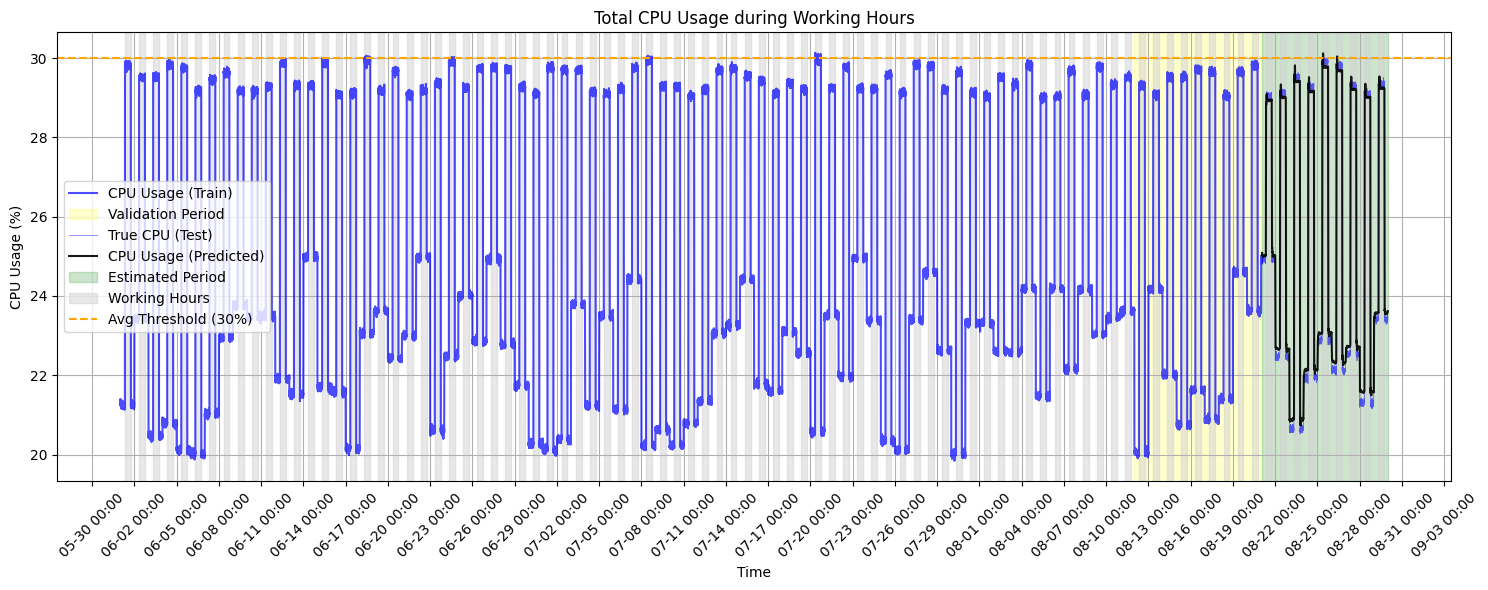

In [ ]:
# 축소 data 저장
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. 전체 예측 시계열 구성 (Train은 실제값, Test는 예측값)
all_pred_series = pd.concat([
    df['cpu'][:test_time_index[0]],       # Train 구간은 실제 측정값
    test_series_pred                      # Test 구간은 예측값
])
all_pred_series.name = "cpu_pred"

# 2. 업무시간 (08:00~18:00), 비업무시간 추출
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. 조건 1: 업무시간 평균 CPU 사용률 ≤ 30%
condition1_flag = work_time.mean() <= 30
avg_threshold = 30

# 4. 조건 2: 업무시간 > 비업무시간 평균
condition2_flag = work_time.mean() > nowork_time.mean()

# 5. 조건 3: 전체 표준편차 ≤ 5%
std_all = all_pred_series.std()
condition3_flag = std_all <= 5

# 6. 축소 판단
downgrade_flag = condition1_flag and condition2_flag and condition3_flag

if condition1_flag:
    downgrade_times = work_time.index
else:
    downgrade_times = []

# 7. 시각화 (Train과 Test 색상 구분)
fig, ax = plt.subplots(figsize=(15, 6))

# Train 구간
train_series = df['cpu'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="CPU Usage (Train)", color="blue", alpha=0.7)

# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test 구간
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test 정답값
ax.plot(test_series_pred.index, test_series_pred.values, label="CPU Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# 업무시간 배경 색칠
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # 첫 번째에만 라벨 부여
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# 기준선
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (30%)")

# # 업그레이드 신호 표시
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# 마무리 설정
ax.set_title("Total CPU Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("CPU Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit 위한 csv 저장

# 평균 사용률 저장
cpu_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
cpu_avg_df.to_csv("cpu_avg_usage_CNN4.csv", index=False)

import json
with open("cpu_accuracy_metrics_CNN4.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_CNN4.csv") # 전체 cpu
test_series_pred.to_csv("cpu_usage_predicted_only_CNN4.csv") # 예측 구간 cpu
work_time.to_csv("cpu_usage_working_hours_CNN4.csv") # 업무시간 cpu

# 9. 텍스트 저장
with open("downgrade_decision_CNN4.txt", "w") as f:
    f.write(f"Condition 1 (Work avg ≤ 30): {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2 (Work avg > Nowork avg): {condition2_flag} ({work_time.mean():.2f}% > {nowork_time.mean():.2f}%)\n")
    f.write(f"Condition 3 (STD ≤ 5): {condition3_flag} ({std_all:.2f})\n")
    f.write(f"Final Decision: {'Downgrade Recommended' if downgrade_flag else 'No Downgrade'}\n")

fig.savefig("cpu_plot_CNN4.png")

## 3. CNN-BiLSTM + sliding window (5) + CNN 2층 쌓기

In [ ]:
from tensorflow.keras.layers import Bidirectional
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import sawtooth
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# reshape y to match CNN-BiLSTM output
y_train_re = y_train.reshape(-1, future_steps)
y_test_re  = y_test.reshape(-1, future_steps)

# ✅ CNN-BiLSTM 모델 구성
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(past_steps, 1)),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, activation='tanh')),
    Dense(future_steps)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ✅ reshape for Conv1D & LSTM
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ✅ 학습
model.fit(X_train_cnn, y_train_re, epochs=20, batch_size=16, verbose=1)

# ✅ 예측
pred = model.predict(X_test_cnn).reshape(-1, future_steps)
true = y_test_re.reshape(-1, future_steps)

# ✅ 복원 (정규화 → 원래 단위 [%]로)
pred_inv = scaler.inverse_transform(pred)
true_inv = scaler.inverse_transform(true)

# ✅ 성능 출력
print("CNN-BiLSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R²  :", r2_score(true_inv, pred_inv))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 18, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,949 (261.52 KB)

 Trainable params: 66,949 (261.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 0.0299
Epoch 2/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0110
Epoch 3/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0106
Epoch 4/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0101
Epoch 5/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0101
Epoch 6/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0112
Epoch 7/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0112
Epoch 8/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0109
Epoch 9/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0110
Epoch 10/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - loss: 0.0112
Epoch 11/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0110
Epoch 12/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0115
Epoch 13/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0106
Epoch 14/20
1295/1295 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0098
E

CNN-BiLSTM
MAE : 0.28716183572450105
RMSE: 1.019256251888618
R2: 0.9171998651744466


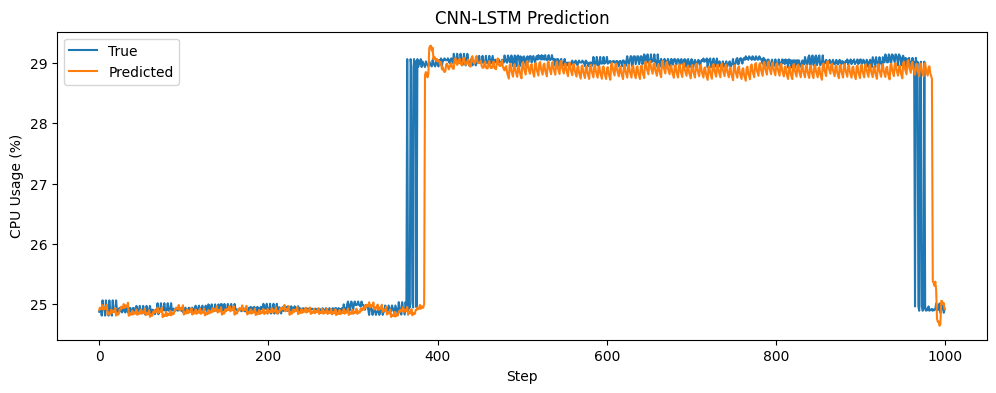

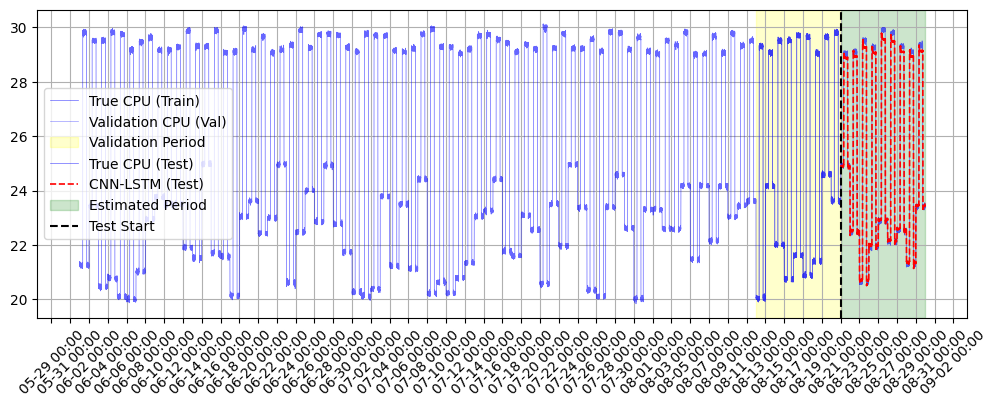

In [ ]:
# plot

print("CNN-BiLSTM")
print("MAE :", mean_absolute_error(true_inv, pred_inv))
print("RMSE:", np.sqrt(mean_squared_error(true_inv, pred_inv)))
print("R2:", r2_score(true_inv, pred_inv))

metrics = {
    "MAE": round(mean_absolute_error(true_inv, pred_inv), 2),
    "RMSE": round(np.sqrt(mean_squared_error(true_inv, pred_inv)), 2),
    "R2": r2_score(true_inv, pred_inv)
}


plt.figure(figsize=(12, 4))
plt.plot(true_inv.flatten()[:1000], label="True")
plt.plot(pred_inv.flatten()[:1000], label="Predicted")
plt.title("CNN-LSTM Prediction")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Step")
plt.legend()
plt.show()

# train+test plot
import matplotlib.dates as mdates
total_len = len(df)
train_ratio = 0.8
val_ratio = 0.1

train_end = int(total_len * train_ratio)
val_end = train_end + int(total_len * val_ratio)

test_start_idx = val_end + past_steps
train_series = df['cpu'][:test_start_idx]  # Test 시작 전까지
test_time_index = df.index[test_start_idx : test_start_idx + len(y_test)]
val_series = df['cpu'][train_end:val_end] # validation data
test_series_true= df['cpu'][test_start_idx:]

all_future_times = []
all_future_preds = []
future_interval = 5

# timestamp 매핑
for i in range(len(test_time_index)):
    for j in range(future_steps):
        # 샘플 끝나는 시점 + (j+1)*5분
        future_time = test_time_index[i] + pd.Timedelta(minutes=(j+1)*future_interval)
        all_future_times.append(future_time)
        all_future_preds.append(pred[i, j])

pred_df = pd.DataFrame({"time": all_future_times,
                        "pred": scaler.inverse_transform(np.array(all_future_preds).reshape(-1,1)).flatten()})

pred_df_mean = pred_df.groupby("time").mean().sort_index()
test_series_pred = pd.Series(pred_df_mean['pred'], index=pred_df_mean.index) # test data (estimated)


# visualization
fig, ax = plt.subplots(figsize=(12,4))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.plot(train_series,label = "True CPU (Train)", color = "blue", alpha = 0.6,linewidth = 0.5)

# validation
plt.plot(val_series, label="Validation CPU (Val)", color="blue", alpha = 0.4, linewidth = 0.5)
# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# test
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5)
plt.plot(test_series_pred, label="CNN-LSTM (Test)", color="red", linestyle="--", linewidth = 1.2)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

plt.axvline(test_time_index[0], color="black", linestyle="--", label="Test Start") # test data start line
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")

plt.legend()
plt.grid(True)
plt.show()

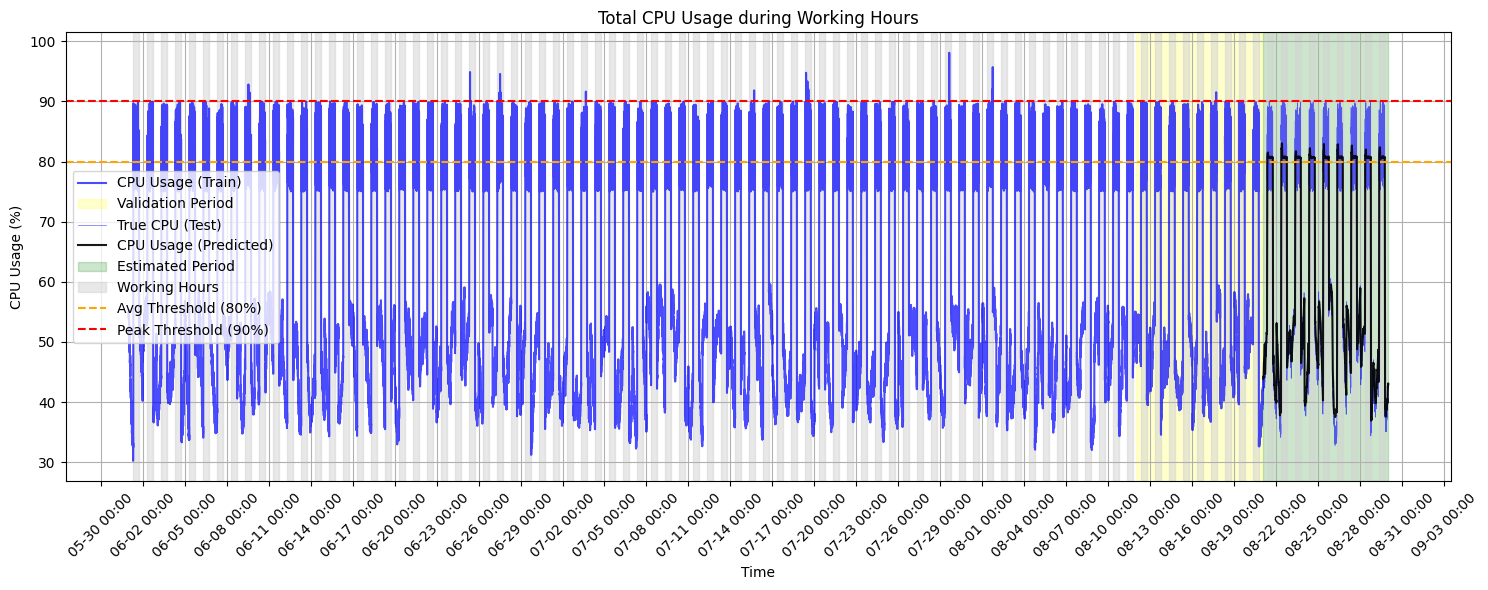

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. 전체 예측 시계열 구성 (Train은 실제값, Test는 예측값)
all_pred_series = pd.concat([
    df['cpu'][:test_time_index[0]],       # Train 구간은 실제 측정값
    test_series_pred                      # Test 구간은 예측값
])
all_pred_series.name = "cpu_pred"

# 2. 업무시간 (08:00~18:00)만 추출
work_time = all_pred_series.between_time("08:00", "18:00")

# 3. 조건 1: 업무시간 평균 CPU 사용률 ≥ 80%
avg_threshold = 80
work_time_flag = work_time.mean() >= avg_threshold
nowork_time_flag = nowork_time.mean() >= avg_threshold
condition1_flag = work_time_flag or nowork_time_flag # 업무시간 또는 비업무 시간에 average 80 % 이상이면 증설 필요

# 4. 조건 2: 업무시간 중 피크(≥90%) 발생한 날이 전체의 80% 이상
peak_threshold = 90
daily_peak_flags = (all_pred_series > peak_threshold)
daily_peak = daily_peak_flags.groupby(daily_peak_flags.index.date).any()
peak_days = daily_peak.sum()
total_days = len(daily_peak)
condition2_flag = (peak_days / total_days) >= 0.8

# 5. 증설 판단
upgrade_flag = condition1_flag or condition2_flag

# 6. Upgrade 표시할 시간대 지정
if condition1_flag:
    upgrade_times = work_time.index
elif condition2_flag:
    # 조건 2 충족 시 peak 발생일 기준
    peak_day_list = daily_peak[daily_peak].index[:5]  # 최대 5일
    upgrade_times = work_time[work_time.index.date.astype(str).isin(peak_day_list.astype(str))].index
else:
    upgrade_times = []

# 7. 시각화 (Train과 Test 색상 구분)
fig, ax = plt.subplots(figsize=(15, 6))

# Train 구간
train_series = df['cpu'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="CPU Usage (Train)", color="blue", alpha=0.7)

# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test 구간
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test 정답값
ax.plot(test_series_pred.index, test_series_pred.values, label="CPU Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# 업무시간 배경 색칠
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # 첫 번째에만 라벨 부여
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# 기준선
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (80%)")
ax.axhline(peak_threshold, color='red', linestyle='--', label="Peak Threshold (90%)")

# 업그레이드 신호 표시
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# 마무리 설정
ax.set_title("Total CPU Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("CPU Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit 위한 csv 저장
cpu_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
cpu_avg_df.to_csv("cpu_avg_usage_Bi-LSTM3.csv", index=False)

import json
with open("cpu_accuracy_metrics_Bi-LSTM3.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_Bi-LSTM3.csv") # 전체 cpu
test_series_pred.to_csv("cpu_usage_predicted_only_Bi-LSTM3.csv") # 예측 구간 cpu
work_time.to_csv("cpu_usage_working_hours_Bi-LSTM3.csv") # 업무시간 cpu
daily_peak.to_csv("cpu_peak_flag_per_day_Bi-LSTM3.csv") # peak 발생 여부

with open("upgrade_decision_Bi-LSTM3.txt", "w") as f: # 업그레이드 유무
    f.write(f"Condition 1: {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2: {condition2_flag} ({peak_days}/{total_days})\n")
    f.write(f"Final Decision: {'Upgrade Needed' if upgrade_flag else 'No Upgrade Required'}\n")
fig.savefig("cpu_plot_Bi-LSTM3.png")

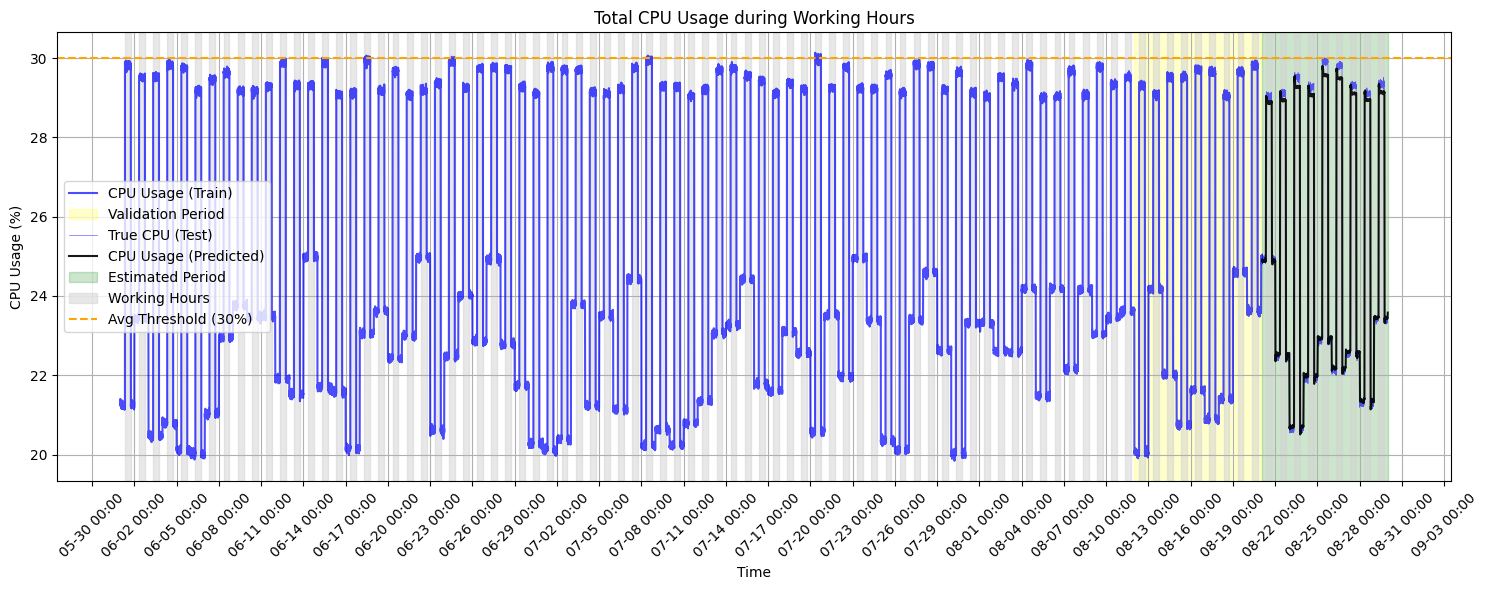

In [ ]:
# 축소 data 저장
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 1. 전체 예측 시계열 구성 (Train은 실제값, Test는 예측값)
all_pred_series = pd.concat([
    df['cpu'][:test_time_index[0]],       # Train 구간은 실제 측정값
    test_series_pred                      # Test 구간은 예측값
])
all_pred_series.name = "cpu_pred"

# 2. 업무시간 (08:00~18:00), 비업무시간 추출
work_time = all_pred_series.between_time("08:00", "18:00")
nowork_time = all_pred_series.between_time("18:00", "07:00")

# 3. 조건 1: 업무시간 평균 CPU 사용률 ≤ 30%
condition1_flag = work_time.mean() <= 30
avg_threshold = 30

# 4. 조건 2: 업무시간 > 비업무시간 평균
condition2_flag = work_time.mean() > nowork_time.mean()

# 5. 조건 3: 전체 표준편차 ≤ 5%
std_all = all_pred_series.std()
condition3_flag = std_all <= 5

# 6. 축소 판단
downgrade_flag = condition1_flag and condition2_flag and condition3_flag

if condition1_flag:
    downgrade_times = work_time.index
else:
    downgrade_times = []

# 7. 시각화 (Train과 Test 색상 구분)
fig, ax = plt.subplots(figsize=(15, 6))

# Train 구간
train_series = df['cpu'][:test_time_index[0]]
ax.plot(train_series.index, train_series.values, label="CPU Usage (Train)", color="blue", alpha=0.7)

# Validation 구간에 색상 입히기
val_start = val_series.index[0]
val_end = val_series.index[-1]
ax.axvspan(val_start, val_end, color='yellow', alpha=0.2, label="Validation Period")

# Test 구간
plt.plot(test_series_true, label="True CPU (Test)", color="blue", alpha = 0.6, linewidth = 0.5) # test 정답값
ax.plot(test_series_pred.index, test_series_pred.values, label="CPU Usage (Predicted)", color="black",alpha=0.9)
test_start = test_series_pred.index[0]
test_end = test_series_pred.index[-1]
ax.axvspan(test_start, test_end, color='green', alpha=0.2, label="Estimated Period")

# 업무시간 배경 색칠
unique_dates = pd.to_datetime(all_pred_series.index.date).unique()
first = True
for date in unique_dates:
    start = pd.Timestamp(f"{date} 08:00")
    end = pd.Timestamp(f"{date} 18:00")
    label = "Working Hours" if first else None  # 첫 번째에만 라벨 부여
    ax.axvspan(start, end, color='lightgray', alpha=0.5, label=label)
    first = False

# 기준선
ax.axhline(avg_threshold, color='orange', linestyle='--', label="Avg Threshold (30%)")

# # 업그레이드 신호 표시
# if len(upgrade_times) > 0:
#     ax.scatter(upgrade_times, work_time.loc[upgrade_times], color='red', label="Upgrade Signal", zorder=5, s=20)

# 마무리 설정
ax.set_title("Total CPU Usage during Working Hours")
ax.set_xlabel("Time")
ax.set_ylabel("CPU Usage (%)")
ax.legend()
ax.grid(True)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha="center")
plt.tight_layout()
plt.show()

# streamlit 위한 csv 저장

# 평균 사용률 저장
cpu_avg_df = pd.DataFrame({
    'type': ['work', 'nowork'],
    'avg_usage': [work_time.mean(), nowork_time.mean()]
})
cpu_avg_df.to_csv("cpu_avg_usage_Bi-LSTM4.csv", index=False)

import json
with open("cpu_accuracy_metrics_Bi-LSTM4.json", "w") as f:
    json.dump(metrics, f)

all_pred_series.to_csv("all_series_Bi-LSTM4.csv") # 전체 cpu
test_series_pred.to_csv("cpu_usage_predicted_only_Bi-LSTM4.csv") # 예측 구간 cpu
work_time.to_csv("cpu_usage_working_hours_Bi-LSTM4.csv") # 업무시간 cpu

# 9. 텍스트 저장
with open("downgrade_decision_Bi-LSTM4.txt", "w") as f:
    f.write(f"Condition 1 (Work avg ≤ 30): {condition1_flag} ({work_time.mean():.2f}%)\n")
    f.write(f"Condition 2 (Work avg > Nowork avg): {condition2_flag} ({work_time.mean():.2f}% > {nowork_time.mean():.2f}%)\n")
    f.write(f"Condition 3 (STD ≤ 5): {condition3_flag} ({std_all:.2f})\n")
    f.write(f"Final Decision: {'Downgrade Recommended' if downgrade_flag else 'No Downgrade'}\n")

fig.savefig("cpu_plot_Bi-LSTM4.png")

## streamlit 실행 파일(app.py)

In [ ]:
pip install --upgrade streamlit

In [ ]:
import os
# 1. 디렉토리 생성
os.makedirs("cpu_dashboard", exist_ok=True)

# 2. app.py 코드 문자열
code = '''import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json

# CSS 스타일 삽입
st.markdown("""
    <style>
    /* 사이드바 배경 색 */
    [data-testid="stSidebar"] {
        background-color: #f5f5f5;
    }

    /* 라디오 그룹 제목 */
    [data-testid="stSidebar"] [data-testid="stRadio"] > label {
        font-size: 40px !important;
        font-weight: 600;
        color: #1a237e;
    }

    /* 라디오 버튼 항목들 */
    [data-testid="stSidebar"] [data-testid="stRadio"] label {
        font-size: 18px !important;
        color: #0d47a1 !important;
    }
    </style>
""", unsafe_allow_html=True)

# 분석 리소스 선택 (사이드바)
selected_resource = st.sidebar.radio("분석 대상 선택", ["CPU", "Memory", "Disk"])

# CPU
def show_cpu_analysis():
    st.markdown("<h1 style='font-size:30px;'>📈 CPU 사용량 및 증설 판단</h1>", unsafe_allow_html=True)

    # 이상적인 데이터

    st.markdown("#### 1. 이상적인 데이터")

    with st.expander("학습모델 : CNN-LSTM"):
        st.markdown("#### 학습모델 : CNN-LSTM ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_CNN-LSTM.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN-LSTM.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 정확도
        with open("cpu/cpu_accuracy_metrics_CNN-LSTM.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN-LSTM.csv")

        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_CNN-LSTM.png") # fig 파일

    # CNN
    with st.expander("학습모델 : CNN"):
        st.markdown("#### 학습모델 : CNN ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_CNN.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 정확도
        with open("cpu/cpu_accuracy_metrics_CNN.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_CNN.png") # fig 파일

    ## Bi-LSTM
    with st.expander("학습모델 : Bi-LSTM"):
        st.markdown("#### 학습모델 : Bi-LSTM ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_Bi-LSTM.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 조건 재계산
        avg_cpu_ideal = df_work_ideal.values.mean()
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        # 정확도
        with open("cpu/cpu_accuracy_metrics_Bi-LSTM.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_Bi-LSTM.png") # fig 파일


    # 2. 노이즈 많은 데이터

    # --- 파일 불러오기 ---
    df_all = pd.read_csv("cpu/all_series_CNN-LSTM2.csv", index_col=0, parse_dates=True)
    df_pred = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM2.csv", index_col=0, parse_dates=True)
    df_work = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM2.csv", index_col=0, parse_dates=True)
    df_peak = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN-LSTM2.csv", index_col=0, parse_dates=True)


    # --- 조건 재계산 ---
    avg_threshold = 80
    peak_threshold = 90

    avg_cpu = df_work.values.mean()
    condition1_flag = avg_cpu >= avg_threshold

    peak_days = df_peak.values.sum()
    total_days = len(df_peak)
    condition2_flag = (peak_days / total_days) >= 0.8

    upgrade_flag = condition1_flag or condition2_flag

    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    # 정확도 불러오기
    with open("cpu/cpu_accuracy_metrics_CNN-LSTM2.json", "r") as f:
        metrics = json.load(f)

    # --- 업그레이드 표시 시간 추출 ---
    if condition1_flag:
        upgrade_times = df_work.index
    elif condition2_flag:
        peak_day_list = df_peak[df_peak.values.flatten()].index[:5]
        upgrade_times = df_work[df_work.index.date.astype(str).isin(peak_day_list.astype(str))].index
    else:
        upgrade_times = []

    # --- Streamlit 출력 ---

    st.markdown("#### 2. 노이즈 많은 데이터")
    with st.expander("학습모델 : CNN-LSTM"):
      st.markdown("#### 학습모델 : CNN-LSTM")

      # 표시
      df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN-LSTM2.csv")
      avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
      avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

      # 조건 재계산
      avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
      condition1_ideal = avg_cpu_ideal >= avg_threshold

      peak_days_ideal = df_peak_ideal.values.sum()
      total_days_ideal = len(df_peak_ideal)
      condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

      upgrade_ideal = condition1_ideal or condition2_ideal

      st.markdown("#### ⚙️ 평균 CPU 사용률")
      st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
      st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
      focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
      focus_value = max(avg_work, avg_nowork)
      st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

      st.markdown("#### 📊 예측 정확도")
      st.markdown(f"- **MAE**: {metrics['MAE']}")
      st.markdown(f"- **RMSE**: {metrics['RMSE']}")
      st.markdown(f"- **R² Score**: {metrics['R2']}")

      st.markdown("#### 🔍 증설 판단")
      st.markdown("#### 시스템 중요도 : A등급")
      st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 CPU 사용량 ≥ 70%): <code>{condition1_flag}</code> ({avg_cpu:.2f}%)</p>", unsafe_allow_html=True)
      st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

      # 결과 강조
      result_text = '🟥 <b>증설 필요</b>' if upgrade_flag else '🟩 <b>증설 불필요</b>'
      st.markdown(f"<h4>✅ 최종 판단: {result_text}</h3>", unsafe_allow_html=True)
      st.image("cpu/cpu_plot_CNN-LSTM2.png") # fig 파일

    # CNN
    with st.expander("학습모델 : CNN"):
      st.markdown("#### 학습모델 : CNN")

      # --- 파일 불러오기 ---
      df_all = pd.read_csv("cpu/all_series_CNN2.csv", index_col=0, parse_dates=True)
      df_pred = pd.read_csv("cpu/cpu_usage_predicted_only_CNN2.csv", index_col=0, parse_dates=True)
      df_work = pd.read_csv("cpu/cpu_usage_working_hours_CNN2.csv", index_col=0, parse_dates=True)
      df_peak = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN2.csv", index_col=0, parse_dates=True)

      from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

      # 정확도 불러오기
      with open("cpu/cpu_accuracy_metrics_CNN2.json", "r") as f:
          metrics = json.load(f)

      # 표시
      df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN2.csv")
      avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
      avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

      # 조건 재계산
      avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
      condition1_ideal = avg_cpu_ideal >= avg_threshold

      peak_days_ideal = df_peak_ideal.values.sum()
      total_days_ideal = len(df_peak_ideal)
      condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

      upgrade_ideal = condition1_ideal or condition2_ideal

      st.markdown("#### ⚙️ 평균 CPU 사용률")
      st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
      st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
      focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
      focus_value = max(avg_work, avg_nowork)
      st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

      st.markdown("#### 📊 예측 정확도")
      st.markdown(f"- **MAE**: {metrics['MAE']}")
      st.markdown(f"- **RMSE**: {metrics['RMSE']}")
      st.markdown(f"- **R² Score**: {metrics['R2']}")

      st.markdown("#### 🔍 증설 판단")
      st.markdown("#### 시스템 중요도 : A등급")
      st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 CPU 사용량 ≥ 70%): <code>{condition1_flag}</code> ({avg_cpu:.2f}%)</p>", unsafe_allow_html=True)
      st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율): <code>{condition2_flag}</code> ({int(peak_days)}/{total_days})</p>", unsafe_allow_html=True)

      # 결과 강조
      result_text = '🟥 <b>증설 필요</b>' if upgrade_flag else '🟩 <b>증설 불필요</b>'
      st.markdown(f"<h4>✅ 최종 판단: {result_text}</h3>", unsafe_allow_html=True)

      st.image("cpu/cpu_plot_CNN2.png") # fig 파일


    # Bi-LSTM
    with st.expander("학습모델 : Bi-LSTM"):
        st.markdown("#### 학습모델 : Bi-LSTM")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM2.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM2.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM2.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_Bi-LSTM2.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 조건 재계산
        avg_cpu_ideal = df_work_ideal.values.mean()
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        # 정확도
        with open("cpu/cpu_accuracy_metrics_Bi-LSTM2.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM2.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_Bi-LSTM2.png") # fig 파일

   # 3. 증설 필요한 데이터

    st.markdown("#### 3. 증설 필요한 데이터")

    with st.expander("학습모델 : CNN-LSTM"):
        st.markdown("#### 학습모델 : CNN-LSTM ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_CNN-LSTM3.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM3.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM3.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN-LSTM3.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 정확도
        with open("cpu/cpu_accuracy_metrics_CNN-LSTM3.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN-LSTM3.csv")

        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_CNN-LSTM3.png") # fig 파일

    # CNN
    with st.expander("학습모델 : CNN"):
        st.markdown("#### 학습모델 : CNN ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_CNN3.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN3.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN3.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_CNN3.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 정확도
        with open("cpu/cpu_accuracy_metrics_CNN3.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN3.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)
        st.image("cpu/cpu_plot_CNN3.png") # fig 파일

    ## Bi-LSTM
    with st.expander("학습모델 : Bi-LSTM"):
        st.markdown("#### 학습모델 : Bi-LSTM ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM3.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM3.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM3.csv", index_col=0, parse_dates=True)
        df_peak_ideal = pd.read_csv("cpu/cpu_peak_flag_per_day_Bi-LSTM3.csv", index_col=0, parse_dates=True)

        avg_threshold = 80
        peak_threshold = 90

        # 조건 재계산
        avg_cpu_ideal = df_work_ideal.values.mean()
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        # 정확도
        with open("cpu/cpu_accuracy_metrics_Bi-LSTM3.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM3.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work,avg_nowork) # 업무 비업무 중에 큰 avg 사용
        condition1_ideal = avg_cpu_ideal >= avg_threshold

        peak_days_ideal = df_peak_ideal.values.sum()
        total_days_ideal = len(df_peak_ideal)
        condition2_ideal = (peak_days_ideal / total_days_ideal) >= 0.8

        upgrade_ideal = condition1_ideal or condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 증설 판단")
        st.markdown("#### 시스템 중요도 : A등급")
        st.markdown(f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≥ 70%): <code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)
        st.markdown(f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 대비 피크 발생 비율 ≥ 80%): <code>{condition2_ideal}</code> ({int(peak_days_ideal)}/{total_days_ideal})</p>", unsafe_allow_html=True)

        result_text_ideal = '🟥 <b>증설 필요</b>' if upgrade_ideal else '🟩 <b>증설 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h3>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_Bi-LSTM3.png") # fig 파일

   # 4. 축소 필요한 데이터

    st.markdown("#### 4. 증설 필요한 데이터")

    with st.expander("학습모델 : CNN-LSTM"):
        st.markdown("#### 학습모델 : CNN-LSTM ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_CNN-LSTM4.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN-LSTM4.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN-LSTM4.csv", index_col=0, parse_dates=True)

        avg_threshold = 30
        std_threshold = 5  # C등급 기준: 표준편차 5% 이하

        # 평균 사용률 조건
        avg_cpu_ideal = max(avg_work, avg_nowork)
        condition1_ideal = avg_cpu_ideal <= avg_threshold

        # 표준편차 계산
        std_cpu_ideal = df_all_ideal['cpu'].std()
        condition2_ideal = std_cpu_ideal <= std_threshold

        # 축소 판단
        shrink_ideal = condition1_ideal and condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 축소 판단")
        st.markdown("#### 시스템 중요도 : C등급")

        # 조건 1: 평균 사용률
        st.markdown(
            f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≤ 30%): "
            f"<code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True
        )

        # 조건 2: 표준편차
        st.markdown(
            f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 표준편차 ≤ 5%): "
            f"<code>{condition2_ideal}</code> ({std_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True
        )

        # 최종 판단 출력
        result_text_ideal = '🟩 <b>축소 권고</b>' if shrink_ideal else '🟥 <b>축소 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h4>", unsafe_allow_html=True)


        st.image("cpu/cpu_plot_CNN-LSTM4.png") # fig 파일

    # CNN
    with st.expander("학습모델 : CNN"):
        st.markdown("#### 학습모델 : CNN ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_CNN4.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_CNN4.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_CNN4.csv", index_col=0, parse_dates=True)

        avg_threshold = 30  # 평균 사용률 기준 (C등급)
        std_threshold = 5   # 표준편차 기준 (C등급)

        # 정확도
        with open("cpu/cpu_accuracy_metrics_CNN4.json", "r") as f:
            metrics_ideal = json.load(f)

        # 평균 사용률 계산
        df_avg = pd.read_csv("cpu/cpu_avg_usage_CNN4.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]
        avg_cpu_ideal = max(avg_work, avg_nowork)
        condition1_ideal = avg_cpu_ideal <= avg_threshold

        # 표준편차 계산
        std_cpu_ideal = df_all_ideal['cpu'].std()
        condition2_ideal = std_cpu_ideal <= std_threshold

        # 축소 최종 판단
        shrink_ideal = condition1_ideal and condition2_ideal

        # UI 출력
        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 축소 판단")
        st.markdown("#### 시스템 중요도 : C등급")

        st.markdown(
            f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≤ 30%): "
            f"<code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

        st.markdown(
            f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 표준편차 ≤ 5%): "
            f"<code>{condition2_ideal}</code> ({std_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

        result_text_ideal = '🟩 <b>축소 권고</b>' if shrink_ideal else '🟥 <b>축소 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h4>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_CNN4.png")  # 시각화


    ## Bi-LSTM
    with st.expander("학습모델 : Bi-LSTM"):
        st.markdown("#### 학습모델 : Bi-LSTM ")

        # 데이터 불러오기
        df_all_ideal = pd.read_csv("cpu/all_series_Bi-LSTM4.csv", index_col=0, parse_dates=True)
        df_pred_ideal = pd.read_csv("cpu/cpu_usage_predicted_only_Bi-LSTM4.csv", index_col=0, parse_dates=True)
        df_work_ideal = pd.read_csv("cpu/cpu_usage_working_hours_Bi-LSTM4.csv", index_col=0, parse_dates=True)

        avg_threshold = 30  # 평균 사용률 축소 기준 (C등급)
        std_threshold = 5   # 표준편차 축소 기준 (C등급)

        # 정확도
        with open("cpu/cpu_accuracy_metrics_Bi-LSTM3.json", "r") as f:
            metrics_ideal = json.load(f)

        # 결과 표시
        df_avg = pd.read_csv("cpu/cpu_avg_usage_Bi-LSTM4.csv")
        avg_work = df_avg[df_avg['type'] == 'work']['avg_usage'].values[0]
        avg_nowork = df_avg[df_avg['type'] == 'nowork']['avg_usage'].values[0]

        # 조건 재계산
        avg_cpu_ideal = max(avg_work, avg_nowork)
        condition1_ideal = avg_cpu_ideal <= avg_threshold

        std_cpu_ideal = df_all_ideal['cpu'].std()
        condition2_ideal = std_cpu_ideal <= std_threshold

        shrink_ideal = condition1_ideal and condition2_ideal

        st.markdown("#### ⚙️ 평균 CPU 사용률")
        st.markdown(f"- 업무시간 평균 사용률: **{avg_work:.1f}%**")
        st.markdown(f"- 비업무시간 평균 사용률: **{avg_nowork:.1f}%**")
        focus_period = "업무시간" if avg_work > avg_nowork else "비업무시간"
        focus_value = max(avg_work, avg_nowork)
        st.markdown(f"- 운영 집중 시간대: **{focus_period} ({focus_value:.1f}%)**")

        st.markdown("#### 📊 예측 정확도")
        st.markdown(f"- **MAE**: {metrics_ideal['MAE']}")
        st.markdown(f"- **RMSE**: {metrics_ideal['RMSE']}")
        st.markdown(f"- **R² Score**: {metrics_ideal['R2']}")

        st.markdown("#### 🔍 축소 판단")
        st.markdown("#### 시스템 중요도 : C등급")

        st.markdown(
            f"<p style='font-size:18px'><b>조건 1.</b> (운영 집중 시간대 평균 사용률 ≤ 30%): "
            f"<code>{condition1_ideal}</code> ({avg_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

        st.markdown(
            f"<p style='font-size:18px'><b>조건 2.</b> (전체 구간 표준편차 ≤ 5%): "
            f"<code>{condition2_ideal}</code> ({std_cpu_ideal:.2f}%)</p>", unsafe_allow_html=True)

        result_text_ideal = '🟩 <b>축소 권고</b>' if shrink_ideal else '🟥 <b>축소 불필요</b>'
        st.markdown(f"<h4>✅ 최종 판단: {result_text_ideal}</h4>", unsafe_allow_html=True)

        st.image("cpu/cpu_plot_Bi-LSTM4.png")  # fig 파일


   # pdf 생성
    from fpdf import FPDF

    st.markdown("---")
    st.markdown("### 📝 PDF 보고서 만들기")

    # --- 체크박스 선택
    include_accuracy = st.checkbox("예측 정확도 포함", value=True)
    include_conditions = st.checkbox("증설 및 축소 조건 판단 포함", value=True)
    include_chart = st.checkbox("CPU 사용량 그래프 포함", value=True)

    if st.button("📄 PDF로 저장하기"):
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=12)

        pdf.set_title("CPU Usage Report")

        pdf.cell(200, 10, txt="📈 CPU 사용량 및 증설 판단 보고서", ln=True, align="L")

        if include_accuracy:
            pdf.ln(10)
            pdf.set_font("Arial", style='B', size=12)
            pdf.cell(200, 10, txt="예측 정확도", ln=True)
            pdf.set_font("Arial", size=11)
            pdf.cell(200, 8, txt=f"- MAE: {metrics['MAE']}", ln=True)
            pdf.cell(200, 8, txt=f"- RMSE: {metrics['RMSE']}", ln=True)
            pdf.cell(200, 8, txt=f"- R² Score: {metrics['R2']}", ln=True)

        if include_conditions:
            pdf.ln(10)
            pdf.set_font("Arial", style='B', size=12)
            pdf.cell(200, 10, txt="증설 조건 판단", ln=True)
            pdf.set_font("Arial", size=11)
            pdf.cell(200, 8, txt=f"조건 1: {condition1_flag} ({avg_cpu:.2f}%)", ln=True)
            pdf.cell(200, 8, txt=f"조건 2: {condition2_flag} ({int(peak_days)}/{total_days})", ln=True)
            decision = "증설 필요" if upgrade_flag else "증설 불필요"
            pdf.cell(200, 8, txt=f"최종 판단: {decision}", ln=True)

        if include_chart:
            # 그래프를 이미지로 저장
            chart_path = "cpu_dashboard"
            fig.savefig(chart_path, bbox_inches='tight')
            pdf.ln(10)
            pdf.set_font("Arial", style='B', size=12)
            pdf.cell(200, 10, txt="CPU 사용량 그래프", ln=True)
            pdf.image(chart_path, x=10, w=190)

        output_path = r"C:\jupyter\cpu_dashboard\cpu_report.pdf"
        pdf.output(output_path)

        st.success(f"PDF 보고서가 저장되었습니다: `{output_path}`")
        st.download_button("📥 PDF 다운로드", data=open(output_path, "rb"), file_name="cpu_report.pdf")

def show_memory_analysis():
    st.markdown("🛠 Memory 분석은 준비 중입니다.")

def show_disk_analysis():
    st.markdown("🛠 Disk 분석은 준비 중입니다.")

# 선택한 리소스에 따라 분석 함수 호출
if selected_resource == "CPU":
    show_cpu_analysis()
elif selected_resource == "Memory":
    show_memory_analysis()
elif selected_resource == "Disk":
    show_disk_analysis()


# st.markdown("<h1 style='font-size:30px;'>📈 CPU 사용량 및 증설 판단</h1>", unsafe_allow_html=True)

'''

# 파일 저장
with open("cpu_dashboard/app.py", "w", encoding="utf-8") as f:
    f.write(code)


# 저장후에 bash에서 streamlit run app.py 입력